In [149]:
import uproot # for reading ROOT files, in this notebook it won't be used but it is still very useful for many analyses
import numpy as np
import importlib
import basicfunc as bf
from scipy.stats import exponnorm
import matplotlib.pyplot as plt

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\libreria\\basicfunc.py'>

# 'normal' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integrale dell'istogramma nel range [-1.021409642410335, 0.9418634596017222] = 366 ± 19


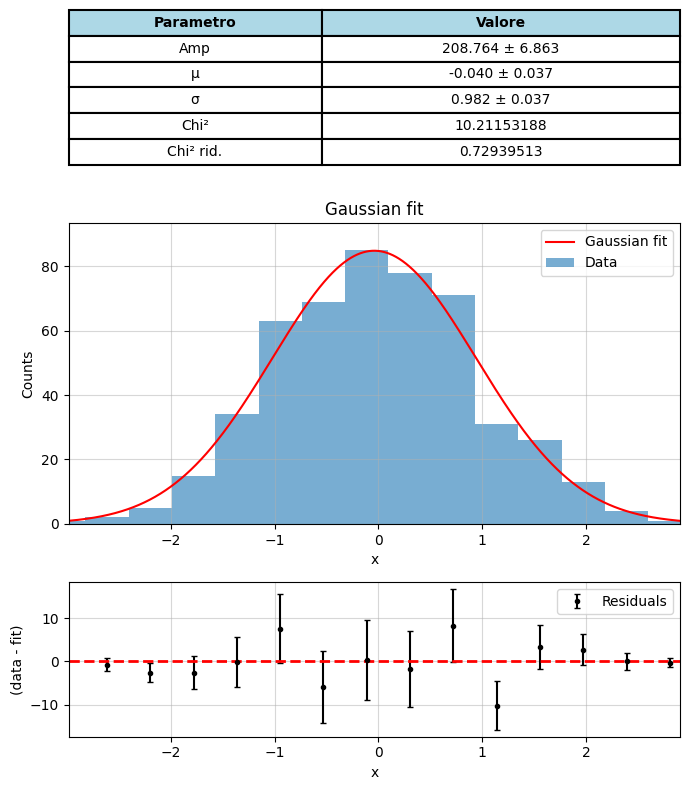

In [150]:
# Data generation 
data = np.random.normal(loc=0, scale=1, size=500)

# Test of the normal fit function
ex_normal = bf.normal(data=data, xlabel="x", ylabel="Counts", titolo="Gaussian fit", n=1, plot=True)


# 'gauss_exp' function

In [151]:
# Parametri della EMG
K = 1.5           # K = lambda * sigma
mu = 0.0          # media della gaussiana
sigma = 1.0       # deviazione standard
N = 1000          # numero di dati

# Data generation with noise
data = exponnorm.rvs(K, loc=mu, scale=sigma, size=N)

# Test of the gauss_exp fit function
ex_gauss_exp = bf.gauss_exp(data=data, b=100, xlabel="x", ylabel="Counts", titolo="Gaussian + Exponential fit", n=1, plot=True)


Integrale nell'intervallo [-3.17, 4.83] = 948 ± 30


c:\Users\Utente\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_minpack_py.py:975: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
c:\Users\Utente\Desktop\libreria\basicfunc.py:287: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(gauss_exp_conv, bin_centers_fit, counts_fit, sigma=sigma_counts_fit, p0=p0, absolute_sigma=True, maxfev=10000)
c:\Users\Utente\Desktop\libreria\basicfunc.py:301: RuntimeWarning: divide by zero encountered in divide
  chi2 = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)


TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

# 'compton' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 
- The integral of the histogram in the range mu ± n*sigma
- The plot data (x_fit, y_fit, bin_centers, counts) if you need to plot other thing

Integrale dell'istogramma nel range [453.2649957212626, 551.6901360443313] = 2052 ± 45


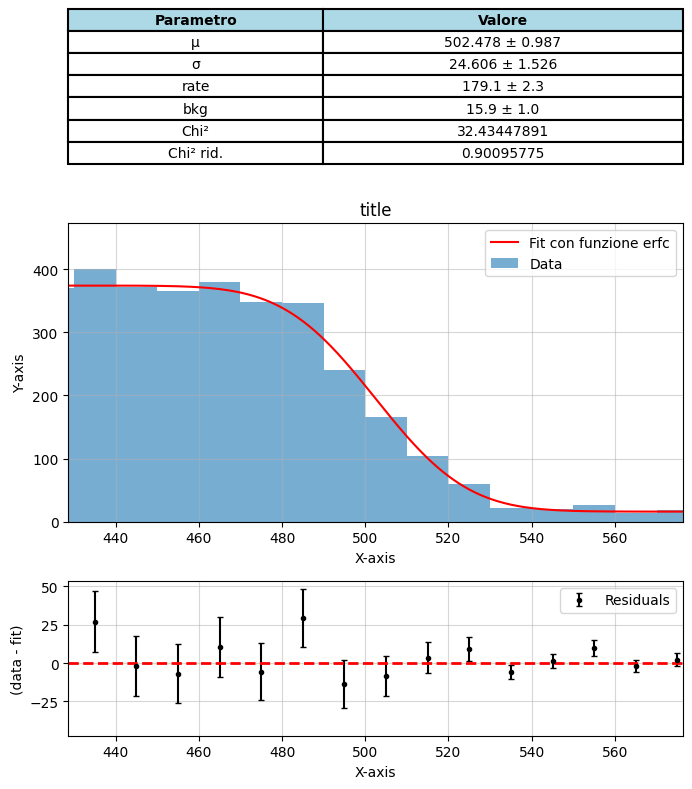

In [ ]:
# Edge parameters
mu = 500
sigma = 20
rate = 1000
bkg = 50
x = np.linspace(0, 1000, 2000)
# Data generation with the erfc function
y_clean = rate * (1 - 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))) + bkg
# Data generation with some noise
probability_distribution = y_clean / np.sum(y_clean)
prova = np.random.choice(x, size=20000, p=probability_distribution)

# Test of the compton fit function
ex_compton = bf.compton(data=prova, b=100, xmin=300, xmax=700, n=2, plot=True)

# 'linear' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

m = 2.5793070952365804 ± 0.01223427191708534
q = 1.1130348519336288 ± 0.07124091942411835
Chi-squared = 2536.453865665315
Reduced chi-squared = 90.58763805947554


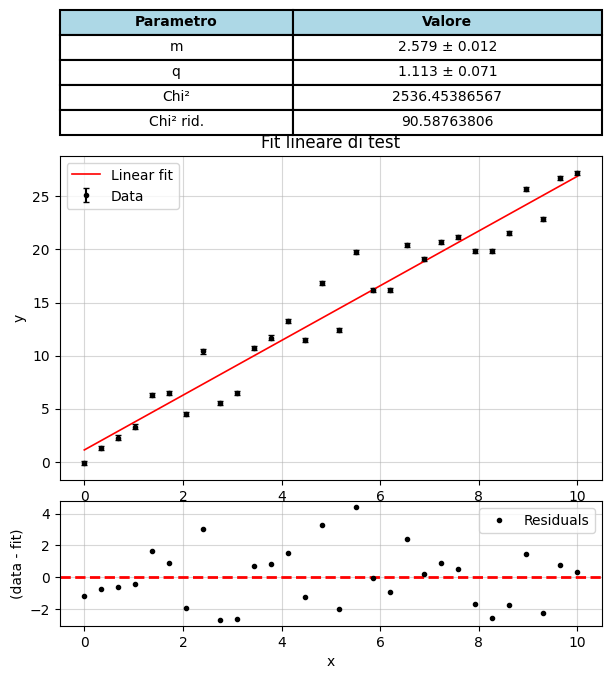

In [ ]:
# Parameters
m_true = 2.5
q_true = 1.0

# Data generation with high noise level
x = np.linspace(0, 10, 30)
y_clean = m_true * x + q_true
rumore = np.random.normal(0, 2.0, size=x.size)
y = y_clean + rumore
# Errori fittizi (sy) per simulare incertezza nella misura
sy = np.full_like(x, 0.2) # constant y error
sx = np.zeros_like(x)     # no x error

# Test of the linear fit function
ex_linear = bf.linear(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit lineare di test", plot=True)

# 'exponential' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Parametri ottimizzati:
A = 1.9781988597930735 ± 1.14684782227601
tau = 932.0520633906599 ± 1505.7232901531677
f0 = 0.00901793095945997 ± 1.0695749784240103
Chi-squared = 0.0008834851009368481
Reduced Chi-squared = 0.00017669702018736962


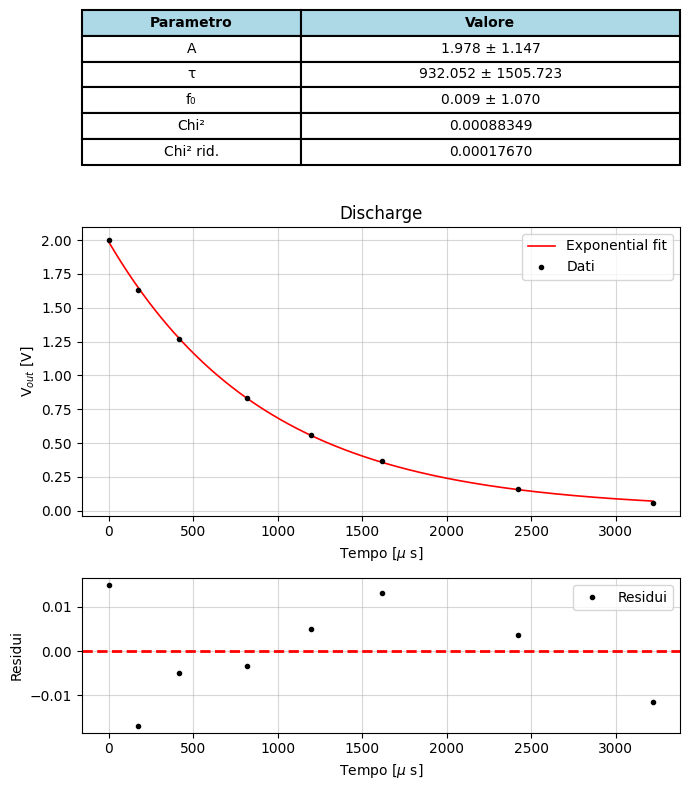

In [ ]:
# Fake data of a discharge curve
x = np.array([1, 176, 416, 816, 1200, 1620, 2420, 3220]) #microseconds
y = np.array([2.00, 1.63, 1.27, 0.83, 0.56, 0.37, 0.16, 0.06]) #volt

#Test of the exponential fit function
caduta_Rsimulazione = bf.exponential(x, y, xlabel=r'Tempo [$\mu$ s]', ylabel=r'V$_{out}$ [V]', titolo=r'Discharge', plot=True)

# 'wigner' function

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

Parametri ottimizzati:
-----------------------------------------------
a = 7.6062540990904015 ± 0.1660455637988117
gamma = 3.0247963466544374 ± 0.09368247611881518
x0 = 4.997766628396263 ± 0.031837411462684005
Chi-squared = 61.35277282608028
Reduced Chi-squared = 1.3053781452357507


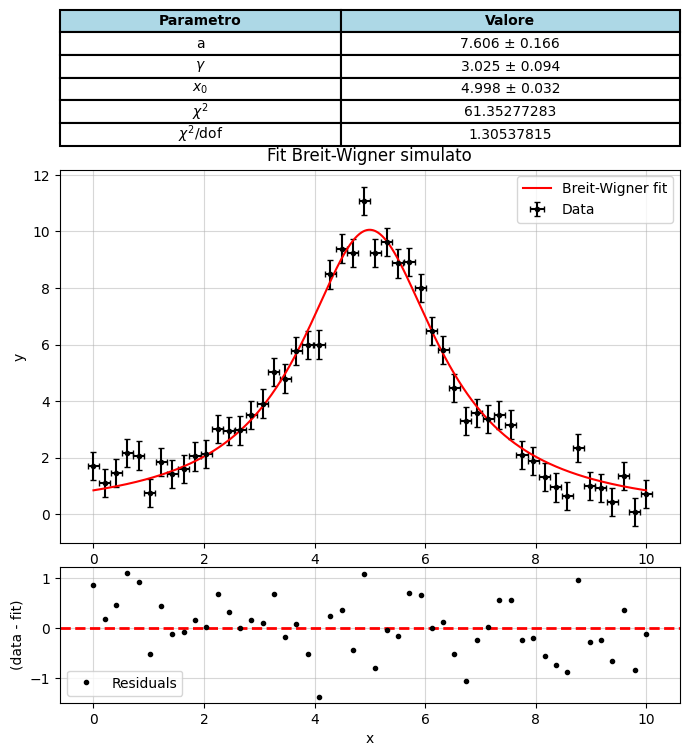

In [ ]:
# Breit-Wigner definitio for the generation of the fake data
def wigner(x, a, gamma, x0):
    return a * gamma**2 / ((x - x0)**2 + gamma**2)

# Real parameters (to generate synthetic data)
a_true = 10
gamma_true = 1.5
x0_true = 5.0

# Data generation with noise
np.random.seed(0)
x = np.linspace(0, 10, 50)
y_clean = wigner(x, a_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.5, size=x.shape)
y = y_clean + noise

# Simulated errors
sy = np.full_like(y, 0.5)
sx = np.full_like(x, 0.1)

# Test of the Breit-Wigner fit function
prova_breit = bf.breitwigner(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y", titolo="Fit Breit-Wigner simulato", plot=True)

# 'lorentzian' function

In [153]:
# Lorentzian function (equivalente a Breit-Wigner con a/π e FWHM)
def lorentz(x, A, gamma, x0):
    return A * (gamma**2) / ((x - x0)**2 + gamma**2)

# Parametri reali (per generare dati fittizi)
A_true = 8
gamma_true = 1.2
x0_true = 4.0

# Generazione dati
np.random.seed(42)
x = np.linspace(0, 8, 60)
y_clean = lorentz(x, A_true, gamma_true, x0_true)
noise = np.random.normal(0, 0.4, size=x.shape)
y = y_clean + noise

# Errori simulati
sy = np.full_like(y, 0.4)
sx = np.full_like(x, 0.05)

# Test of the Lorentzian fit function
ex_lorentz = bf.lorentzian(x, y, sx=sx, sy=sy, xlabel="x", ylabel="y")

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi squared
- The reduced chi squared 

This fit returns a list which contains, in order:
- A numpy array with the parameters
- A numpy array with the uncertainties
- A numpy array with the residuals
- The chi square

RecursionError: maximum recursion depth exceeded